In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/harik/python pratice/00 - datasets-20251216T065029Z-1-001/00 - datasets/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [6]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [7]:
data.rename(columns={
    'Daily Time Spent on Site':'Daily_Time',
    'Daily Internet Usage':'Daily_Usage',
    'Ad Topic Line':'Topic',
    'Clicked on Ad':'Clicked'    
}, inplace=True)

In [8]:
#date_formats = pd.read_csv('/Users/geethika/C/Datasets/date_format.csv')
#date_formats

In [9]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'],format='%d-%m-%Y %H:%M')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Daily_Time   1000 non-null   float64       
 1   Age          1000 non-null   int64         
 2   Area Income  1000 non-null   float64       
 3   Daily_Usage  1000 non-null   float64       
 4   Topic        1000 non-null   object        
 5   City         1000 non-null   object        
 6   Male         1000 non-null   int64         
 7   Country      1000 non-null   object        
 8   Timestamp    1000 non-null   datetime64[ns]
 9   Clicked      1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


In [10]:
data.head()

,Daily_Time,Age,Area Income,Daily_Usage,Topic,City,Male,Country,Timestamp,Clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0


In [11]:
#data['Timestamp'].dt.day

In [12]:
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data.head()

,Daily_Time,Age,Area Income,Daily_Usage,Topic,City,Male,Country,Timestamp,Clicked,Hour,Day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0,3,4


### EDA - Exploratory Data Analysis

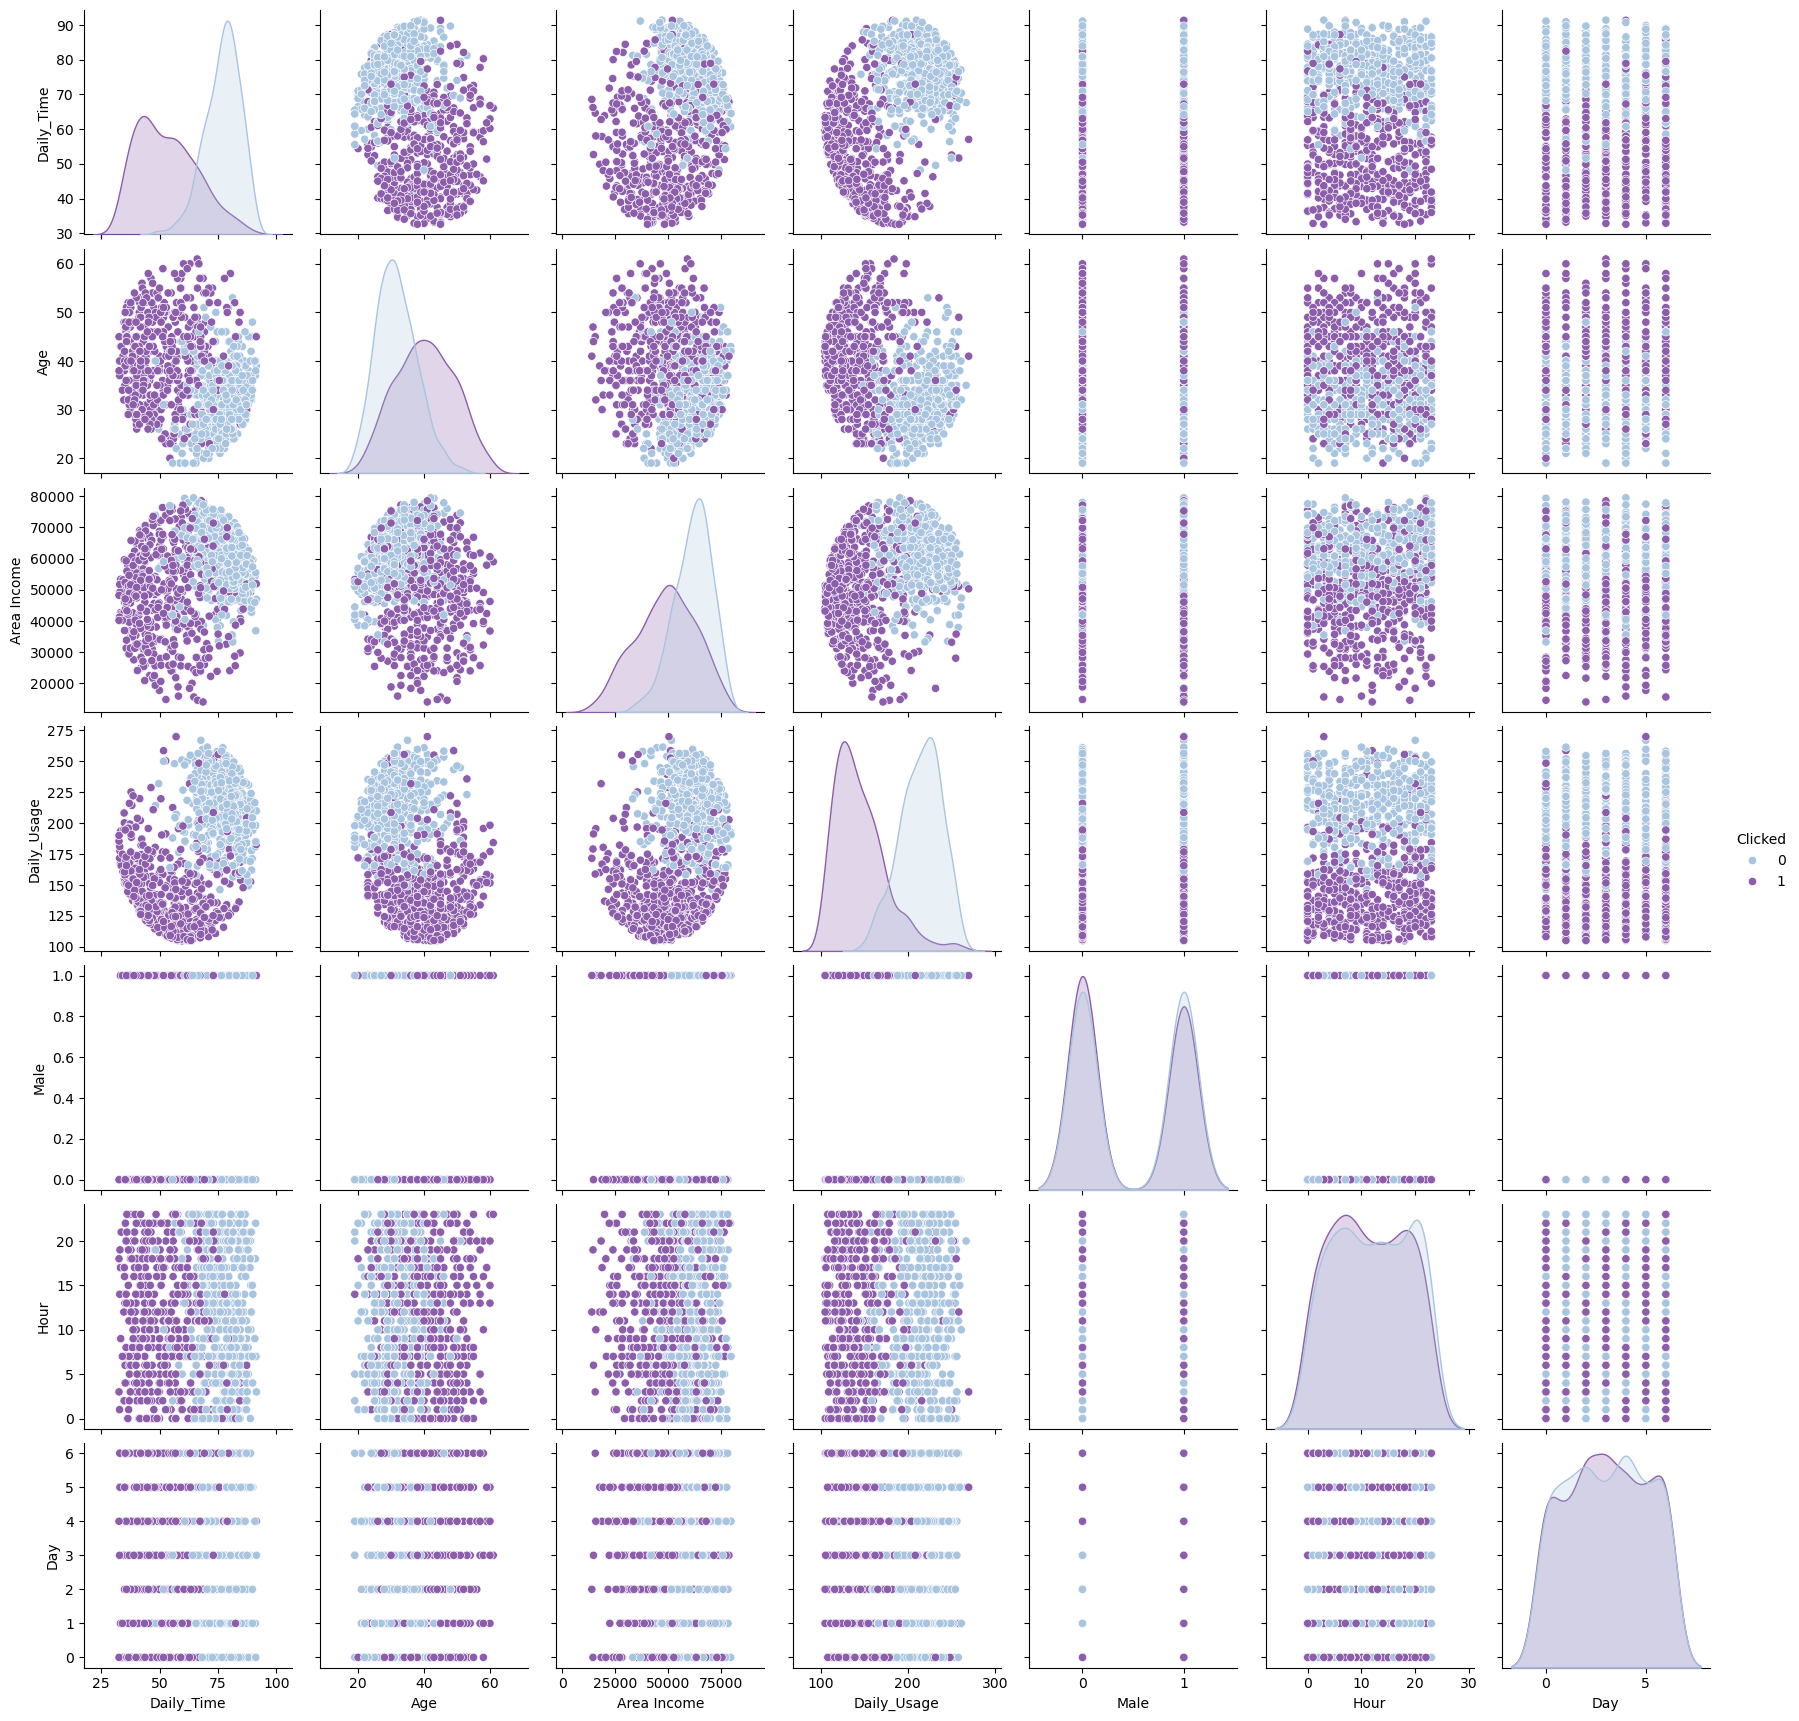

In [13]:
sns.pairplot(data, hue='Clicked', palette='BuPu')
plt.show()

In [14]:
corr = data.corr(numeric_only=True)
corr

,Daily_Time,Age,Area Income,Daily_Usage,Male,Clicked,Hour,Day
Daily_Time,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117,0.000895,0.018336
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531,-0.049905,0.013593
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255,0.034573,0.013879
Daily_Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539,0.074347,0.009035
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027,0.058552,-0.038861
Clicked,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000,-0.047431,0.002003
Hour,0.000895,-0.049905,0.034573,0.074347,0.058552,-0.047431,1.000000,0.007034
Day,0.018336,0.013593,0.013879,0.009035,-0.038861,0.002003,0.007034,1.000000


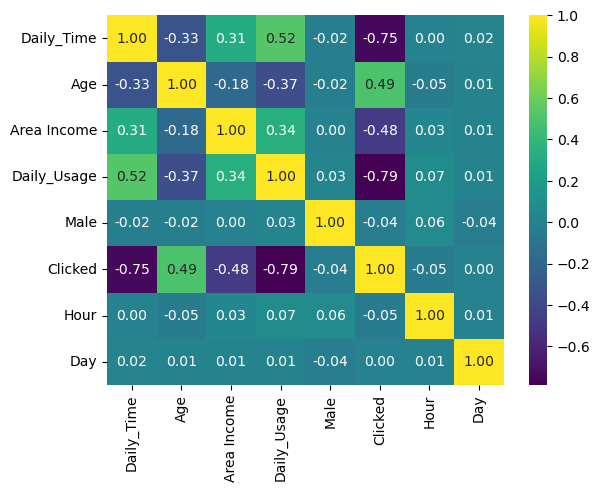

In [15]:
sns.heatmap(corr, cmap='viridis', annot=True, fmt='0.2f')
plt.show()

##### Conclusion: There are no strong correlations between the features. The features are independent of each other.

#### Age Distribution

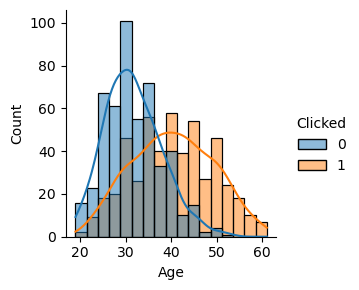

In [16]:
sns.displot(data=data, x='Age',
            kind='hist',
            height=3,
            color='Tomato',
            hue='Clicked',
            kde=True
           )
plt.show()

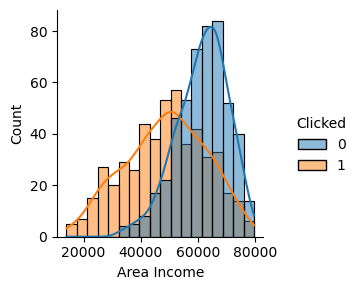

In [17]:
sns.displot(data=data, x='Area Income',
            kind='hist',
            height=3,
            color='Tomato',
            hue='Clicked',
            kde = True
           )
plt.show()

#### Box Plot 

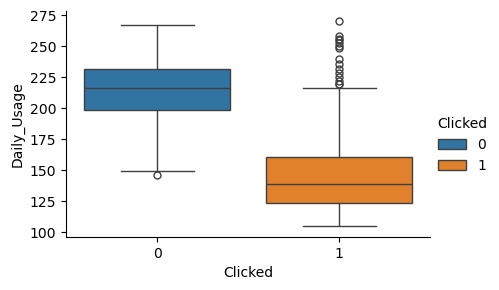

In [18]:
sns.catplot(data=data, x='Clicked',y='Daily_Usage', 
            kind='box',
            height=3, aspect=1.5,
            hue='Clicked'
           )
plt.show()

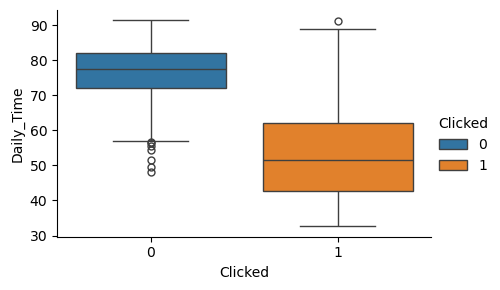

In [19]:
sns.catplot(data=data, x='Clicked',y='Daily_Time', 
            kind='box',
            height=3, aspect=1.5,
            hue='Clicked'
           )
plt.show()

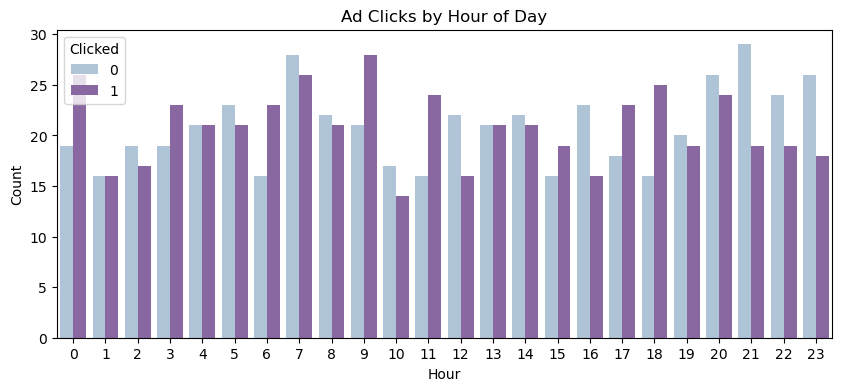

In [20]:
# Clicked on Ad by Hour
plt.figure(figsize=(10, 4))
sns.countplot(x='Hour', hue='Clicked', data=data, palette='BuPu')
plt.title('Ad Clicks by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

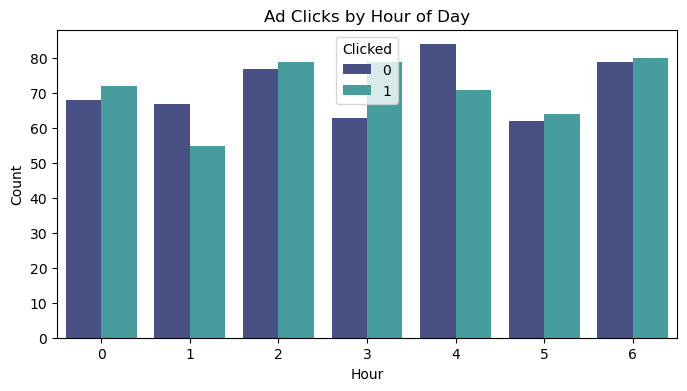

In [21]:
# Clicked on Ad by Hour
plt.figure(figsize=(8, 4))
sns.countplot(x='Day', hue='Clicked', data=data, palette='mako')
plt.title('Ad Clicks by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#### Split the data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data.columns

Index(['Daily_Time', 'Age', 'Area Income', 'Daily_Usage', 'Topic', 'City',
       'Male', 'Country', 'Timestamp', 'Clicked', 'Hour', 'Day'],
      dtype='object')

In [24]:
#data.info()

In [25]:
# X = data._get_numeric_data().drop('Clicked', axis=1)
# X = data.select_dtypes(exclude=['object','datetime64[ns]']).columns
# X = data.select_dtypes(include = ['int64','float64','int32']).copy()

X = data[['Daily_Time', 'Age', 'Area Income', 'Daily_Usage','Male', 'Hour', 'Day']]
y = data['Clicked']

In [26]:
X.head(3)

,Daily_Time,Age,Area Income,Daily_Usage,Male,Hour,Day
0,68.95,35,61833.90,256.09,0,0,6
1,80.23,31,68441.85,193.77,1,1,0
2,69.47,26,59785.94,236.50,0,20,6


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 7), (200, 7), (800,), (200,))

#### Build the Model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Build the model
clf = LogisticRegression(max_iter=500)

# Train the model
clf.fit(X_train,y_train)

LogisticRegression(max_iter=500)

#### Evaluate Model on Training Data

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [31]:
yhat_train = clf.predict(X_train)
cm = confusion_matrix(y_train,yhat_train)
cm

array([[404,   7],
       [ 12, 377]], dtype=int64)

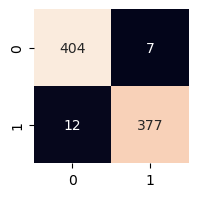

In [32]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()

In [33]:
print(classification_report(y_train,yhat_train))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       411
           1       0.98      0.97      0.98       389

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800



In [34]:
def plot_roc(y,yhat):

    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y, yhat)
    print(f'AUC: {auc}')
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.xlabel('False Positive Rate(FPR)')
    plt.ylabel('True Positive Rate(TPR)')
    
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1], 'o--')
    plt.show()

AUC: 0.9760600203904203


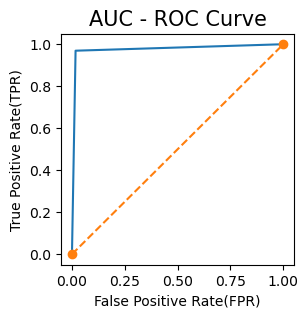

In [35]:
plot_roc(y_train,yhat_train)

#### Evaluate Model on Testing Data

In [36]:
yhat_test = clf.predict(X_test)

cm = confusion_matrix(y_test,yhat_test)
cm

array([[ 83,   6],
       [  5, 106]], dtype=int64)

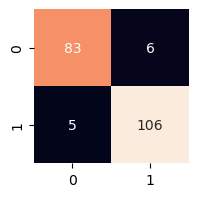

In [37]:
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.show()

In [38]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



AUC: 0.9437696123089382


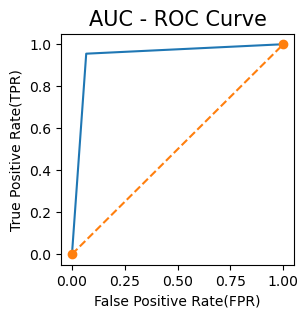

In [39]:
plot_roc(y_test,yhat_test)